In [10]:
import pandas as pd
dev_df = pd.read_csv('/opt/ml/Team/dataset/test/dev-v.0.0.2.csv')
dev_df['label'] = dev_df['label'].apply(lambda x:100)
dev_df.to_csv('/opt/ml/Team/dataset/test/dev-v.0.0.2.csv')

In [42]:
orgin_df = pd.read_csv('/opt/ml/Team/dataset/dev/dev-v.0.0.2.csv')
test_df = pd.read_csv('/opt/ml/Team/results/submission-KoSimCSE-roberta-64-5e-05.csv')
orgin_df['predict'] = test_df['pred_label']
df = orgin_df.copy()

In [51]:
from sklearn.metrics import confusion_matrix, classification_report
# 혼동 행렬(confusion matrix) 계산
class_names =sorted(list(df['label'].unique()))
conf_matrix = confusion_matrix(df['label'], df['predict'], labels=class_names)

for i, class_name in enumerate(class_names):
    true_positive = conf_matrix[i, i]
    false_positive = conf_matrix[:, i].sum() - true_positive
    false_negative = conf_matrix[i, :].sum() - true_positive

    print(f'Class {class_name}:')
    print(f'  Count: {true_positive + false_positive}')
    print(f'  True Positives: {true_positive}')
    print(f'  False Positives: {false_positive}')
    print(f'  False Negatives: {false_negative}')
    print(f'  Accuracy: {true_positive / (true_positive + false_positive):.2%}\n')

# 분류 보고서(classification report) 출력
print(classification_report(df['label'], df['predict'], target_names=class_names))

Class no_relation:
  Count: 2370
  True Positives: 1565
  False Positives: 805
  False Negatives: 342
  Accuracy: 66.03%

Class org:alternate_names:
  Count: 314
  True Positives: 232
  False Positives: 82
  False Negatives: 32
  Accuracy: 73.89%

Class org:dissolved:
  Count: 7
  True Positives: 5
  False Positives: 2
  False Negatives: 8
  Accuracy: 71.43%

Class org:founded:
  Count: 95
  True Positives: 79
  False Positives: 16
  False Negatives: 11
  Accuracy: 83.16%

Class org:founded_by:
  Count: 35
  True Positives: 26
  False Positives: 9
  False Negatives: 5
  Accuracy: 74.29%

Class org:member_of:
  Count: 224
  True Positives: 188
  False Positives: 36
  False Negatives: 185
  Accuracy: 83.93%

Class org:members:
  Count: 48
  True Positives: 32
  False Positives: 16
  False Negatives: 52
  Accuracy: 66.67%

Class org:number_of_employees/members:
  Count: 5
  True Positives: 5
  False Positives: 0
  False Negatives: 5
  Accuracy: 100.00%

Class org:place_of_headquarters:
  

In [45]:
# Source별 정확도 계산 및 출력
source_accuracy = df.groupby('source').apply(lambda group: classification_report(group['label'], group['label'], target_names=class_names))
print("\nSource-wise Accuracy:")
print(source_accuracy)

ValueError: Number of classes, 6, does not match size of target_names, 30. Try specifying the labels parameter

In [1]:
import pandas as pd
from settings import *
df = pd.read_csv(os.path.join(TRAIN_DIR, 'train.csv'))

In [88]:
from transformers import AutoTokenizer, AutoConfig, AutoModelForSequenceClassification, Trainer, TrainingArguments, RobertaConfig, RobertaTokenizer, RobertaForSequenceClassification, BertTokenizer
MODEL_NAME = "BM-K/KoSimCSE-roberta"

# tokenized_dataset
def tokenized_dataset(dataset, model_name=MODEL_NAME):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    concat_entity = []
    for idx, rows in tqdm(dataset.iterrows(), total=dataset.shape[0], desc='tokenizing...'):
        sub_entity, obj_entity, sentence = rows['subject_entity'], rows['object_entity'], rows['sentence']
        temp = sub_entity + '[SEP]' + obj_entity + '[SEP]' + sentence
        tokenized_sentences = tokenizer(
            temp,
            return_tensors='pt', 
            add_special_tokens=True
        )
        concat_entity.append(tokenized_sentences)
    return concat_entity

preprocessed_data = tokenized_dataset(df)

In [105]:
import numpy as np
length = [len(token['input_ids'].squeeze()) for token in preprocessed_data]
sorted(length, reverse=True)

[320,
 314,
 313,
 309,
 308,
 307,
 304,
 303,
 302,
 300,
 300,
 300,
 300,
 298,
 298,
 297,
 297,
 297,
 297,
 296,
 296,
 296,
 294,
 293,
 292,
 292,
 290,
 290,
 290,
 290,
 288,
 287,
 287,
 287,
 286,
 286,
 285,
 282,
 281,
 281,
 281,
 281,
 280,
 280,
 279,
 279,
 278,
 276,
 275,
 275,
 274,
 274,
 274,
 273,
 273,
 272,
 271,
 271,
 271,
 270,
 270,
 270,
 269,
 269,
 269,
 269,
 268,
 268,
 268,
 268,
 267,
 267,
 267,
 266,
 266,
 266,
 266,
 266,
 266,
 266,
 265,
 265,
 265,
 264,
 264,
 264,
 264,
 264,
 263,
 263,
 263,
 263,
 263,
 263,
 263,
 262,
 262,
 262,
 262,
 262,
 261,
 261,
 261,
 261,
 260,
 260,
 260,
 260,
 260,
 259,
 259,
 259,
 259,
 258,
 258,
 258,
 258,
 257,
 256,
 256,
 256,
 256,
 255,
 255,
 255,
 254,
 254,
 253,
 253,
 253,
 253,
 253,
 252,
 252,
 252,
 252,
 252,
 252,
 252,
 252,
 251,
 251,
 251,
 251,
 250,
 250,
 250,
 250,
 250,
 250,
 249,
 249,
 249,
 249,
 249,
 249,
 249,
 249,
 248,
 248,
 248,
 248,
 247,
 247,
 247,
 247,
 247

In [5]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import math
import matplotlib.pyplot as plt

In [21]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import math
import matplotlib.pyplot as plt
torch.manual_seed(0)

def preprocessing_dataset(dataset):
  """ 처음 불러온 csv 파일을 원하는 형태의 DataFrame으로 변경 시켜줍니다."""
  subject_entity = []
  object_entity = []
  for i,j in zip(dataset['subject_entity'], dataset['object_entity']):
    i = i[1:-1].split(',')[0].split(':')[1]
    j = j[1:-1].split(',')[0].split(':')[1]

    subject_entity.append(i)
    object_entity.append(j)
  out_dataset = pd.DataFrame({'id':dataset['id'], 'sentence':dataset['sentence'],'subject_entity':subject_entity,'object_entity':object_entity,'label':dataset['label'],})
  return out_dataset

dataset = preprocessing_dataset(df)
dataset_size = len(dataset)
train_dataset, validation_dataset = random_split(dataset, [math.floor(dataset_size*0.8), math.ceil(dataset_size*0.2)])
print(f"dataset length is {len(dataset)}")
print(f"train dataset length is {len(train_dataset)}")
print(f"validation dataset length is {len(validation_dataset)}")

train_df = dataset.iloc[train_dataset.indices].reset_index(drop=True)
validation_df = dataset.iloc[validation_dataset.indices].reset_index(drop=True)
train_df.to_csv('train.csv', index=False)
validation_df.to_csv('validation.csv', index=False)

dataset length is 32470
train dataset length is 25976
validation dataset length is 6494


In [22]:
dataset.value_counts(['label'])

label                              
no_relation                            9534
org:top_members/employees              4284
per:employee_of                        3573
per:title                              2103
org:member_of                          1866
org:alternate_names                    1320
per:origin                             1234
org:place_of_headquarters              1195
per:date_of_birth                      1130
per:alternate_names                    1001
per:spouse                              795
per:colleagues                          534
per:parents                             520
org:founded                             450
org:members                             420
per:date_of_death                       418
org:product                             380
per:children                            304
per:place_of_residence                  193
per:other_family                        190
per:place_of_birth                      166
org:founded_by                          

<BarContainer object of 30 artists>

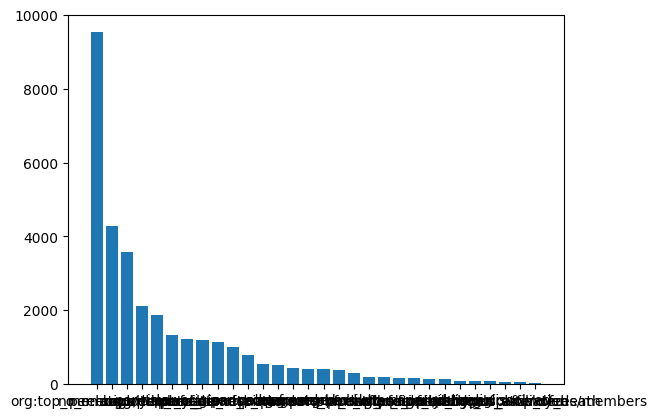

In [23]:
plt.bar(dataset['label'].value_counts().index, dataset['label'].value_counts().values)

In [24]:
train_df.value_counts(['label'])

label                              
no_relation                            7664
org:top_members/employees              3417
per:employee_of                        2803
per:title                              1680
org:member_of                          1490
org:alternate_names                    1076
per:origin                              982
org:place_of_headquarters               959
per:date_of_birth                       909
per:alternate_names                     818
per:spouse                              647
per:colleagues                          415
per:parents                             405
org:founded                             367
per:date_of_death                       344
org:members                             328
org:product                             290
per:children                            245
per:place_of_residence                  158
per:other_family                        146
org:founded_by                          134
per:place_of_birth                      

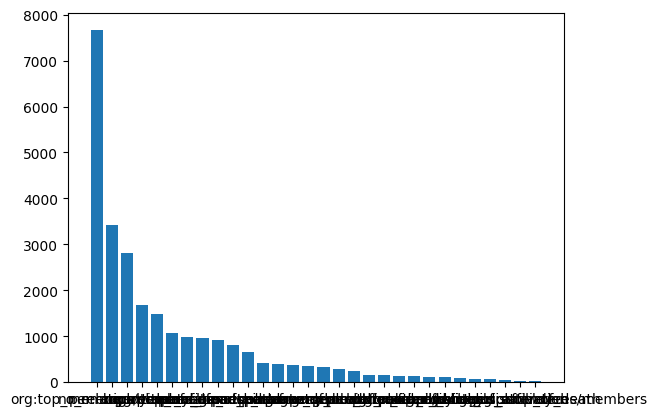

In [25]:
plt.bar(train_df['label'].value_counts().index, train_df['label'].value_counts().values)
print()

In [26]:
relative_frequencies_dataset = [x/len(dataset) for x in dataset['label'].value_counts()]
relative_frequencies_train = [x/len(train_dataset) for x in train_df['label'].value_counts()]
                                                            
differences = [x - y for x, y in zip(relative_frequencies_dataset, relative_frequencies_train)]
differences

[-0.0014166923313828073,
 0.00039267015706806463,
 0.002132737911918689,
 9.239297813366798e-05,
 0.00010779180782261033,
 -0.00076994148444718,
 0.00020018478595627137,
 -0.0001154912226670815,
 -0.00019248537111179326,
 -0.0006621496766245766,
 -0.00042346781644594933,
 0.00046966430551277985,
 0.00042346781644595106,
 -0.0002694795195565137,
 -0.0003079765937788713,
 0.0002463812750230984,
 0.0005389590391130274,
 -6.929473360024578e-05,
 -0.00013858946720049243,
 0.00023098244533415434,
 -4.619648906683052e-05,
 -0.0003464736680012315,
 4.619648906683052e-05,
 3.07976593778873e-05,
 -0.0003695719125346472,
 3.07976593778873e-05,
 -5.389590391130256e-05,
 6.929473360024665e-05,
 0.00013089005235602082,
 3.849707422235913e-05]

In [2]:
import os 
from tqdm.auto import tqdm 
import pandas as pd 

from transformers import AutoTokenizer
from settings import * 

# Load Dataset
dataset = pd.read_csv(os.path.join(TRAIN_DIR, 'train.csv'))

def preprocessing_dataset(dataset):
  """ 처음 불러온 csv 파일을 원하는 형태의 DataFrame으로 변경 시켜줍니다."""
  subject_entity = []
  object_entity = []
  for i,j in zip(dataset['subject_entity'], dataset['object_entity']):
    i = i[1:-1].split(',')[0].split(':')[1]
    j = j[1:-1].split(',')[0].split(':')[1]

    subject_entity.append(i)
    object_entity.append(j)
  out_dataset = pd.DataFrame({'id':dataset['id'], 'sentence':dataset['sentence'],'subject_entity':subject_entity,'object_entity':object_entity,'label':dataset['label'],})
  return out_dataset


dataset = preprocessing_dataset(dataset)

# tokenized_dataset
def tokenized_dataset(dataset, model_name='klue/roberta-small'):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    concat_entity = []
    for idx, rows in tqdm(dataset.iterrows(), total=dataset.shape[0], desc='tokenizing...'):
        sub_entity, obj_entity, sentence = rows['subject_entity'], rows['object_entity'], rows['sentence']
        temp = sub_entity + '[SEP]' + obj_entity + '[SEP]' + sentence
        tokenized_sentences = tokenizer(
            temp,
            return_tensors='pt', 
            add_special_tokens=True
        )
        concat_entity.append(tokenized_sentences)
    return concat_entity

# Run 
preprocessed_data = tokenized_dataset(dataset)

# Check 
length = [len(token['input_ids'].squeeze()) for token in preprocessed_data]
max(length) # 241

241

In [3]:
sorted([token['input_ids'].squeeze() for token in preprocessed_data], key=lambda x:len(x), reverse=True)

[tensor([    0,    11,  5689,  4622,    11,     2,    11, 16312,  2440,    11,
             2, 23781,  2440, 13885,  2225,  2145,  2165, 28963,  2120,  5743,
          2069,  1889,  2507,  2088, 25039,  2440,    22,  2429, 27135, 12883,
          2440,    22,  2429,  2299,  2118,    22,  2440,  2366, 25137,   711,
          2170, 12883,  2440,    22,  2429, 13885,  2225,  2145,  2165, 28963,
          2120,  1439,  2145,    22,  2440,  2170,  1161,  2218,  1943,  9944,
         16312,  2440, 13885,  2225,  2165,    12, 13885,  2225,  2145,  2165,
         28963,  2120,    13,  1504,  5689,  4622,  1689,  2079,  2145,  2104,
          2218,  6233,  5780,  2496, 31369,  5689,  4622,  1689,  2079,  2145,
          2104,  2218,  1163,  2145,  2170,  8839,  2069,  1889,  2507, 13964,
          3785,   636,  1897,    16,  5689,  4622, 11082,  2104,  2218,  1163,
          2145,    21,  2440,  9155,  4427,  2179, 16312,  2440, 14473,  5909,
          2536, 29374,  6233,  5909,  2170, 12464,  

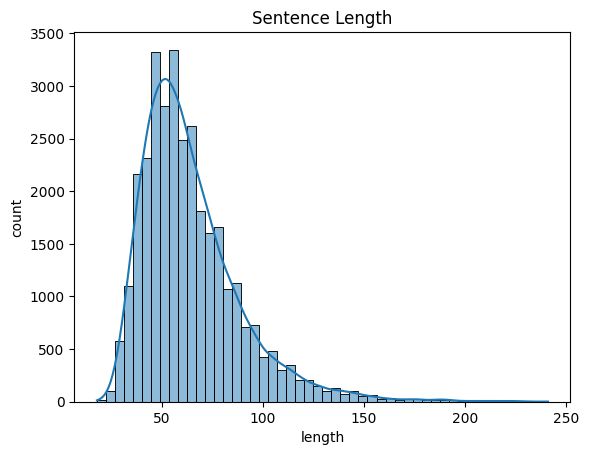

In [6]:
import seaborn as sns
def plot_hist(li: list, bins=50, title=None, xlabel=None, ylabel=None, f_name='figure.png', save=False) -> None:
    sns.histplot(li, bins=bins, kde=True)
    plt.title(title); plt.xlabel(xlabel); plt.ylabel(ylabel)
    #if save:    
    #    plt.savefig(os.path.join(FIG_DIR, f'{f_name}'), dpi=200)
    plt.show()

plot_hist(length, title='Sentence Length', xlabel='length', ylabel='count', f_name='sentence_length_histogram.png', save=True)

In [10]:
from sklearn.model_selection import train_test_split
train_temp, val_temp = train_test_split(dataset, stratify=dataset['label'], random_state=0) #

In [16]:
dataset.value_counts('label', normalize=True)

label
no_relation                            0.293625
org:top_members/employees              0.131937
per:employee_of                        0.110040
per:title                              0.064767
org:member_of                          0.057468
org:alternate_names                    0.040653
per:origin                             0.038004
org:place_of_headquarters              0.036803
per:date_of_birth                      0.034801
per:alternate_names                    0.030828
per:spouse                             0.024484
per:colleagues                         0.016446
per:parents                            0.016015
org:founded                            0.013859
org:members                            0.012935
per:date_of_death                      0.012873
org:product                            0.011703
per:children                           0.009362
per:place_of_residence                 0.005944
per:other_family                       0.005852
per:place_of_birth                

In [15]:
val_temp.value_counts('label', normalize=True)

label
no_relation                            0.293668
org:top_members/employees              0.131929
per:employee_of                        0.110002
per:title                              0.064794
org:member_of                          0.057526
org:alternate_names                    0.040650
per:origin                             0.038064
org:place_of_headquarters              0.036832
per:date_of_birth                      0.034861
per:alternate_names                    0.030796
per:spouse                             0.024513
per:colleagues                         0.016507
per:parents                            0.016014
org:founded                            0.013920
org:members                            0.012934
per:date_of_death                      0.012811
org:product                            0.011702
per:children                           0.009362
per:place_of_residence                 0.005913
per:other_family                       0.005790
per:place_of_birth                

In [14]:
train_temp.value_counts('label', normalize=True)

label
no_relation                            0.293610
org:top_members/employees              0.131940
per:employee_of                        0.110053
per:title                              0.064759
org:member_of                          0.057449
org:alternate_names                    0.040654
per:origin                             0.037985
org:place_of_headquarters              0.036794
per:date_of_birth                      0.034782
per:alternate_names                    0.030839
per:spouse                             0.024474
per:colleagues                         0.016426
per:parents                            0.016015
org:founded                            0.013839
org:members                            0.012935
per:date_of_death                      0.012894
org:product                            0.011703
per:children                           0.009363
per:place_of_residence                 0.005954
per:other_family                       0.005872
per:place_of_birth                